# Logistic Function
在說 Logistic Regression 之前我們先說 Logistic Function

$$
f(x) = \frac{1}{1+\exp(-x)}
$$


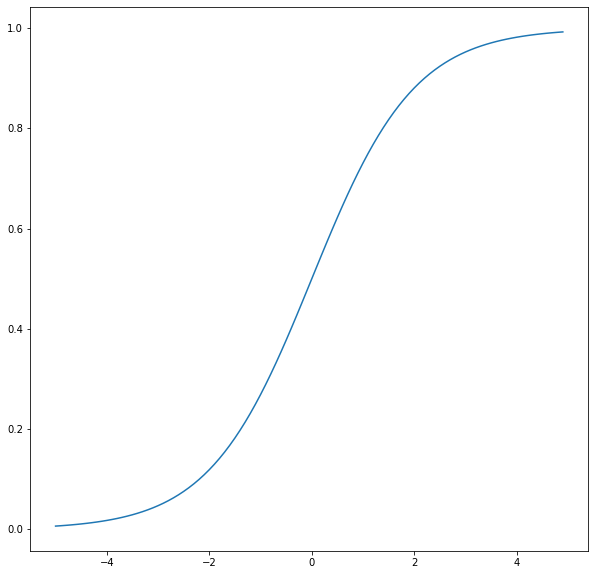

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

x = np.arange(-5, 5, 0.1)
y = 1/(1+np.exp(-x))

plt.plot(x, y)


# Logistic Regression
這是個二分類問題，只要$x$在某個值以上就當他是對，反之就當他是錯。 <br>

我們在回想一下我們的資料 $X$ 不是一維的數據阿，我們可以去求函數 $f$，
$$
f(X) = x
$$
我們的 $f$ 可以是線性的或是polynomial。 <br>
對了二分類怎麼加殼成為多分類請參考 輸出，下面進入實戰。


In [7]:
# Logistic Regression
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# 準備 Logistic 模型
classifier = linear_model.LogisticRegression()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))


Training accuracy:  0.9833333333333333
Testing accuracy:  0.9666666666666667


c:\Users\88693\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


我們還可以用參數去做 Ridge, Lasso 跟 Elastic-Net <br>

下面特別說明一下，參數的使用
- penalty : l1, l2, elasticnet, none, default=l2
- solver : 
    - newton-cg - [l2, none]
    - lbfgs - [l2, none]
    - liblinear - [l1, l2]
    - sag - [l2, none]
    - saga - [elasticnet, l1, l2, none]
- l1_ratio : float, default=None

只有在選 elasticnet 的時候要給出 l1 跟 l2 的比例。


In [14]:
# Logistic Regression
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# 準備 Logistic 模型
classifier = linear_model.LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training accuracy: ', classifier.score(X_train, y_train))
print('Testing accuracy: ', classifier.score(X_test, y_test))


Training accuracy:  0.9916666666666667
Testing accuracy:  0.9666666666666667


c:\Users\88693\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
